In [44]:
import numpy as np 
import tensorflow as tf
import tensorflow_datasets as tfds

In [45]:
print(tfds.list_builders())

['abstract_reasoning', 'accentdb', 'aeslc', 'aflw2k3d', 'ag_news_subset', 'ai2_arc', 'ai2_arc_with_ir', 'amazon_us_reviews', 'anli', 'answer_equivalence', 'arc', 'asqa', 'asset', 'assin2', 'asu_table_top_converted_externally_to_rlds', 'austin_buds_dataset_converted_externally_to_rlds', 'austin_sailor_dataset_converted_externally_to_rlds', 'austin_sirius_dataset_converted_externally_to_rlds', 'bair_robot_pushing_small', 'bc_z', 'bccd', 'beans', 'bee_dataset', 'beir', 'berkeley_autolab_ur5', 'berkeley_cable_routing', 'berkeley_fanuc_manipulation', 'berkeley_gnm_cory_hall', 'berkeley_gnm_recon', 'berkeley_gnm_sac_son', 'berkeley_mvp_converted_externally_to_rlds', 'berkeley_rpt_converted_externally_to_rlds', 'big_patent', 'bigearthnet', 'billsum', 'binarized_mnist', 'binary_alpha_digits', 'ble_wind_field', 'blimp', 'booksum', 'bool_q', 'bot_adversarial_dialogue', 'bridge', 'bucc', 'c4', 'c4_wsrs', 'caltech101', 'caltech_birds2010', 'caltech_birds2011', 'cardiotox', 'cars196', 'cassava', 'c

In [46]:
data, info = tfds.load('mnist', with_info=True)
print(info)

tfds.core.DatasetInfo(
    name='mnist',
    full_name='mnist/3.0.1',
    description="""
    The MNIST database of handwritten digits.
    """,
    homepage='http://yann.lecun.com/exdb/mnist/',
    data_dir='C:\\Users\\euiso\\tensorflow_datasets\\mnist\\3.0.1',
    file_format=tfrecord,
    download_size=11.06 MiB,
    dataset_size=21.00 MiB,
    features=FeaturesDict({
        'image': Image(shape=(28, 28, 1), dtype=uint8),
        'label': ClassLabel(shape=(), dtype=int64, num_classes=10),
    }),
    supervised_keys=('image', 'label'),
    disable_shuffling=False,
    splits={
        'test': <SplitInfo num_examples=10000, num_shards=1>,
        'train': <SplitInfo num_examples=60000, num_shards=1>,
    },
    citation="""@article{lecun2010mnist,
      title={MNIST handwritten digit database},
      author={LeCun, Yann and Cortes, Corinna and Burges, CJ},
      journal={ATT Labs [Online]. Available: http://yann.lecun.com/exdb/mnist},
      volume={2},
      year={2010}
    }""",
)


In [47]:
train = data['train']
print(len(train))

train = train.map(lambda x :(x['image'], x['label']))
train = train.shuffle(10000).batch(50000)
batch = next(iter(train))
print(batch[0].shape, batch[1].shape)

train_images, train_labels = batch
train_images = train_images.numpy()
train_labels = train_labels.numpy()
print(train_images.shape, train_labels.shape)
print(type(train_images), type(train_labels))

60000
(50000, 28, 28, 1) (50000,)
(50000, 28, 28, 1) (50000,)
<class 'numpy.ndarray'> <class 'numpy.ndarray'>


In [48]:
test = data['test']
print(len(test))

test = test.map(lambda x :(x['image'], x['label']))
test = test.shuffle(10000).batch(50000)
batch = next(iter(train))
print(batch[0].shape, batch[1].shape)

test_images, test_labels = batch
test_images = test_images.numpy()
test_labels = test_labels.numpy()
print(test_images.shape, test_labels.shape)
print(type(test_images), type(test_labels))

10000
(50000, 28, 28, 1) (50000,)
(50000, 28, 28, 1) (50000,)
<class 'numpy.ndarray'> <class 'numpy.ndarray'>


[33576 23434 33568 49268 46860 40685 41500  1442 37508 26599 14642  3740
 31369 33837  2582  1130]


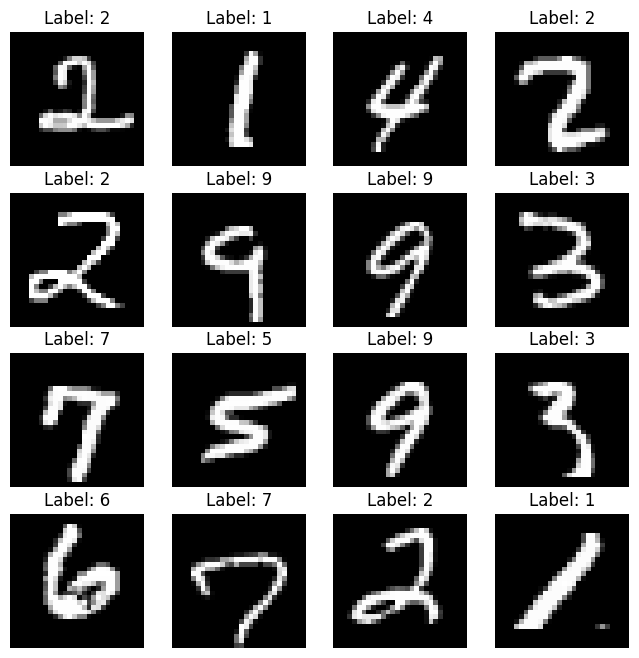

In [49]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 8))

random_idx = np.random.randint(0, len(train_images), size=16)
print(random_idx)

for i, idx in enumerate(random_idx): 

    img = train_images[idx]
    label = train_labels[idx]

    plt.subplot(4, 4, i+1)
    plt.imshow(img, cmap='gray')
    plt.title('Label: {}' .format(label))
    plt.axis('off')

plt.show()

In [50]:
from tensorflow.keras.utils import to_categorical

# train_images = tf.cast(train_images, tf.float32) / 255.0
# test_images = tf.cast(test_images, tf.float32) / 255.0

train_images = train_images/ 255.0
test_images = test_images/ 255.0

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [51]:
from ast import mod
from pyexpat import model
from numpy import ModuleDeprecationWarning
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout

model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(63, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

model.summary()



Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_9 (Conv2D)               │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_12 (Dropout)            │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_13 (Dropout)            │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 3, 3, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (None, 1, 1, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_14 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 63)             │         8,127 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_15 (Dropout)            │ (None, 63)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 10)             │           640 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 117,951 (460.75 KB)

 Trainable params: 117,951 (460.75 KB)

 Non-trainable params: 0 (0.00 B)

In [52]:
# from tensorflow.keras.callbacks import ModelCheckpoint, TensorBoard, EarlyStopping, ReduceLROnPlateau
# cp = ModelCheckpoint('best_model.h5', monitor='val_loss', save_best_only=True, mode='auto')
# tb = TensorBoard(log_dir='logs', histogram_freq=0, write_graph=True, write_images=True, update_freq='epoch', embeddings_freq=1)
# es = EarlyStopping(monitor='val_loss', patience=10, mode='auto', verbose=1)
# rl = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, verbose=1, mode='auto')

In [53]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc'])
history = model.fit(train_images, train_labels, epochs=30, batch_size=32, validation_split=0.2,)

Epoch 1/30
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - acc: 0.5972 - loss: 1.1445 - val_acc: 0.9579 - val_loss: 0.1439
Epoch 2/30
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - acc: 0.9431 - loss: 0.2227 - val_acc: 0.9731 - val_loss: 0.0967
Epoch 3/30
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - acc: 0.9591 - loss: 0.1597 - val_acc: 0.9800 - val_loss: 0.0774
Epoch 4/30
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - acc: 0.9674 - loss: 0.1316 - val_acc: 0.9783 - val_loss: 0.0796
Epoch 5/30
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - acc: 0.9721 - loss: 0.1114 - val_acc: 0.9795 - val_loss: 0.0773
Epoch 6/30
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - acc: 0.9740 - loss: 0.1026 - val_acc: 0.9824 - val_loss: 0.0665
Epoch 7/30
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - acc: 0.9764 - loss: 0.0937 - val_acc: 0.9836 - val_loss: 0.0609
Epoch 8/30
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - acc: 0.9804 - loss: 0.0813 - val_acc: 0.9849 - val_loss: 0.0614
Epoch 9/30
1250/1250 ━━━━━━━━━━━━━━━━━━━

In [54]:
history.history.keys()

dict_keys(['acc', 'loss', 'val_acc', 'val_loss'])

In [55]:
model.evaluate(test_images, test_labels, verbose=2)

1563/1563 - 2s - 1ms/step - acc: 0.9955 - loss: 0.0217


[0.02172512747347355, 0.9955000281333923]

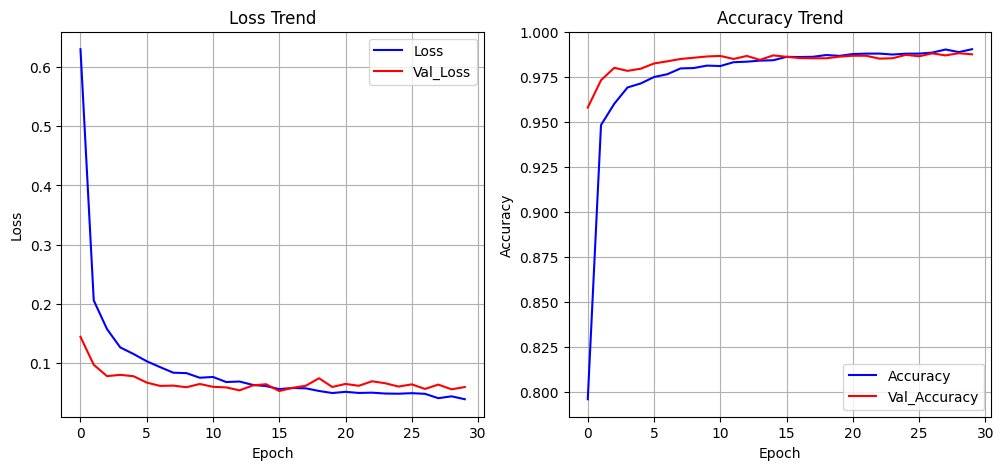

In [56]:
from turtle import color


plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Loss', color='blue' )
plt.plot(history.history['val_loss'], label='Val_Loss', color='red')
plt.title('Loss Trend')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid()

plt.subplot(1, 2, 2)
plt.plot(history.history['acc'], label='Accuracy', color='blue')
plt.plot(history.history['val_acc'], label='Val_Accuracy', color='red')
plt.title('Accuracy Trend')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()

plt.show()

In [57]:
pred_ys =model.predict(test_images)
print(pred_ys.shape)
print(pred_ys[0])
print(np.argmax(pred_ys[0]))

1563/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step
(50000, 10)
[0.0000000e+00 3.8025388e-26 3.1736167e-17 1.0000000e+00 1.7683637e-35
 2.7041338e-15 0.0000000e+00 5.4955427e-23 5.7750488e-17 2.1287138e-19]
3


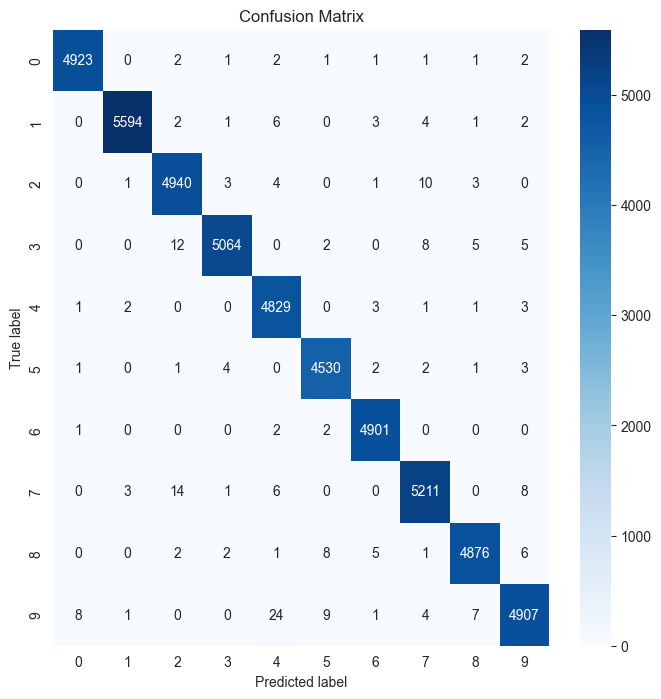

In [58]:
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
import seaborn as sns

sns.set_style("whitegrid")
plt.figure(figsize=(8, 8))
cm =confusion_matrix(np.argmax(test_labels, axis= -1), np.argmax(pred_ys, axis= -1))
sns.heatmap(cm, annot=True, fmt="d", cmap='Blues')
plt.title("Confusion Matrix")
plt.ylabel("True label")
plt.xlabel("Predicted label")
plt.show()